<a href="https://colab.research.google.com/github/eduardozim/Data_science/blob/main/Imers%C3%A3o_de_dados_4_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intensivo Alura

Nome: Eduardo Zim 

Data: 23/05 - 27/05


## Aula 1

- A média da metragem para cada um dos bairros.
- Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas).
- Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.
- Pegar outras estatísticas dos dados (como média, mediana, min, max).
- Descobrir quais são os bairros que não tem nome de rua.



In [1]:
import numpy as np
import pandas as pd

In [69]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

### Analise Exploratória

In [98]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000


In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


-> Constatação 1: as colunas Bairro e Rua tem valores Nulos

      Ação: Como a quantidade não é significante para a variável Bairro ao data set devemos eliminar os dados nulos. 
      
      A Variável de endereço é muito específica para o modelo de regressão então poderá ser removida antes do processo de machine learning 

-> Constatação 2: A coluna Valor está com tipo object (texto) devido a informação da moeda R$.

      Ação: Remover os 3 primeiros caracteres da varivel valor e transformar a variável em int64 (numero)

In [27]:
dados['Cidade'].unique()

array(['São Paulo'], dtype=object)

-> Constatação 3: Somente existe dados da Cidade de São Paulo. A informação é irrelevante no Dataset

      Ação: Remover a coluna do dataset

In [72]:
dados["Valor"] = dados["Valor"].str.replace('R\$\ ','')
dados["Valor"] = dados["Valor"].str.replace('.','').astype(int)
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


ValueError: ignored

-> Constatação 4: Os dados de Valor possuem valores para compra e locação e não puderam ser convertidos para obter as métricas

      Ação: Consultar a área de negócio (Alura+instrutores) sobre o tratamento dos dados.

In [67]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [66]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


### ------- Desafios: ---------

1 - Realizar a média da metragem para cara um dos bairros (Paulo)

In [142]:
dados['Bairro'].nunique()

701

In [80]:
medias_bairros = dados.groupby(['Bairro']).mean()
medias_bairros = medias_bairros.drop(['Quartos','Banheiros','Vagas'], axis=1)
medias_bairros

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


      Conclusão:
      A tabela acima mostra os dados solicitados de médias para Metragem em cada um dos bairros.
      O método Groupby trás as médias de todas as colunas quantitativas, e foi utilizado o método drop para remover as colunas não solicitadas.

2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas).

Os dados da coluna Bairro podem ser selecionados pelo nome da coluna ou pelo indice da coluna.

In [116]:
dados['Bairro']

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [124]:
dados.iloc[:,1]

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

      Conclusão:
      Ambos os métodos apresentam os mesmos resultados, sendo que o método pelo Label é mais prático para seleção de uma unica coluna e o 
      método pelo indice é mais utilizado para ranges de colunas e linhas.

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.


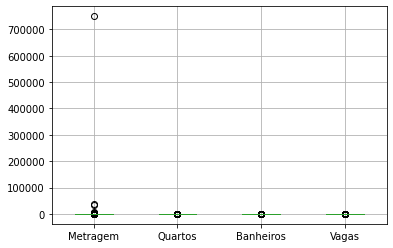

In [125]:
dados.boxplot()

Gosto de utiliza o Boxplot para investigação as variáveis quantitativas que pode-se verificar os outliers, Mediana, quartis de uma forma prática que possibilita eliminar dados que podem prejudicar o Machine Learning.

No caso acima, verificamos que a variável Metragem possui um Outlier muito grande que precisa ser tratado para não impactar a generilização do modelo.

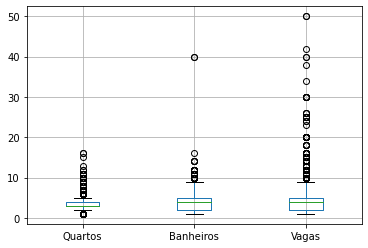

In [129]:
dados_box = dados.iloc[:,4:7]
dados_box.boxplot()

Mantendo apenas as colunas de Quartos, Banheiros e Vagas também observamos uma quantidade grande de valores outliers, porém precisa-se investigar se a concentração deles não impactaria em um modelo de regressão.

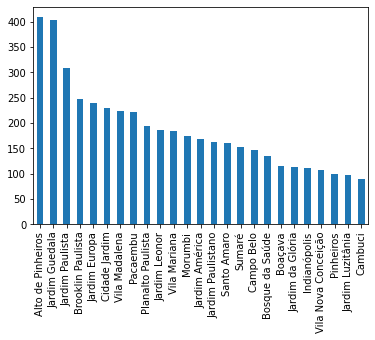

In [135]:
dados['Bairro'].value_counts().head(25).plot.bar()

Para dados qualitativos o gráfico de barras pode ser usado com a contagem dos valores para identificar os valores mais frequentes. Antes de sua utilização precisa verificar e separar osdados mais relevantes para serem apresentados.

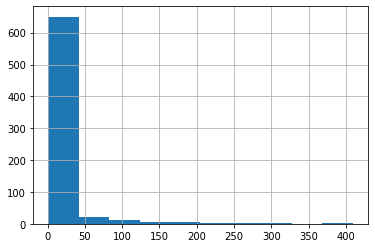

In [138]:
dados['Bairro'].value_counts().hist()

Outro Grafico que nos auxilia é o Histograma que apresenta a contagem dentro das faixas de valores de uma variável qualitativa. 

      Conclusão:
      No caso dos dados QUANTITATIVOS precisamos ter atenção aos dados de outliers das variáveis, elas com certeza impactarão a regressão para 
      determinação de valores de imóveis. Precisamos seguir com uma analise minuciosa destes dados para que tenhamos os melhores resultados no final 
      do processo
      No caso dos dados QUALITATIVOS vemos que a grande maioria dos Bairros (Coluna acima de 600 ocorrencias) tem entre 1 e 40 imóveis a venda, ou 
      seja, apesar de poucos imóveis a sua soma é significante para os dados. Como temos muitos bairros com "poucos" dados cada, isso poderá impactar 
      no aprendizado da regressão para estes bairros e precisamos ter isso em mente quando seguir com o processo. 

4 - Pegar outras estatísticas dos dados (como média, mediana, min, max).


In [81]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


      Conclusão: 
      O método describe tem as métricas principais como contagem, Média, Desvio padrão, Minimo e Máximo, Quartis e Mediana (quartil 2 50%)
      e atende as principais estatisticas necessárias para analise dos dados quantitativos.

5 - Descobrir quais são os bairros que não tem nome de rua.

In [105]:
dados['Rua'].isnull().sum()

3434

In [115]:
sem_info_rua = dados['Rua'].isnull()
sem_info_rua = dados['Bairro'][sem_info_rua].value_counts()
sem_info_rua = pd.DataFrame(sem_info_rua)
sem_info_rua 

,Bairro
Jardim Guedala,190
Alto de Pinheiros,169
Jardim Paulista,138
Jardim Europa,128
Jardim Leonor,118
...,...
Jardim do Colégio (Zona Norte),1
Alto da Boa Vista,1
Jardim Aeroporto,1
Conjunto Residencial Vista Verde,1


      Conclusão:
      Existem 3434 ocorrencias de linhas sem a informação de Rua e sua distribuição é mostrada na tabela acima